# K-Means Clustering 
---
K-Means is one of the most well known as most commonly used algorithms due to its simplicity and speed.
#### Steps for K-Means:-
1. The first step for the algorithm is to initialize a defined number of centroids.
2. The distance between each point and each centroid is calculated, and then points are assigned  to the nearest centroid.
3. Each centroid is then assigned a new position based on mean of all points in the same group.
4. The process then repeats with points re-assigned based on new centroid positions and a new mean calculated, leading to new positions for centroid.
5. The iterations continue until the centroids no longer change their position or the defined number of max iterations is reached.

## K-Means limitations:-
#### Defining the number of clusters-
To define the number of clusters we might need to visually analyze the data to define the clusters. which is not ideal especially if we have multiple dimensions
#### How to solve this issue?
We can use the 'elbow method. for this we need to run K-Means algoritm  multiple times trying a different number of clusters each time and record the values of WCSS.
#### Centroid initialization-
The basic K-Means algo initializes centroids randomly. Hence the result may differ based on the initial position of your centroids and may not be optimal

#### How to solve this issue?
1. initialize centroids multiple times and pick the best run(lowest WCSS)
2. Use smart initialization available with k-means++

#### Distance-based algorithm-
K-Means uses the euclidean distance between different points in space to indentify which ones belong together. due to this we need to be aware of the following:

1. You can only use numeric attributes in the K-Means algo. if you want to use categorial data we need to convert them to neumerical values using ordinal encoder or onehotencoder.
2. We also need to be mindful of the scale and distribution od the attributes that we use in our clusters. we might need to remove outliners using Power Transformation or MinMax scaling.
3. we might prefer to use a density-based  algorithm instead of a distance-based one.

In [7]:
import pandas as pd 
from geopy.geocoders import Nominatim
from progressbar import ProgressBar
import time

from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import plotly.graph_objects as go 

In [8]:
df = pd.read_csv('../data/weatherAUS.csv', encoding = 'utf-8')
df=df[pd.isnull(df['RainTomorrow'])==False]
df=df.fillna(df.mean())

df['Location2']=df['Location'].str.replace( r"([A-Z])", r" \1").str.strip()
df['Location2']=df['Location2'].apply(lambda x: 'Pearce, Bullsbrook' if x=='Pearce R A A F' else x)

df['RainTodayFlag']=df['RainToday'].apply(lambda x: 1 if x=='Yes' else 0)
df['RainTomorrowFlag']=df['RainTomorrow'].apply(lambda x: 1 if x=='Yes' else 0)

In [11]:
loc_list = list(df.Location2.unique())

geolocator = Nominatim(user_agent='Mozilla/5.0 (platform; rv:geckoversion) Gecko/geckotrail Firefox/firefoxversion')
country = "Australia"
loc_res = []

pbar = ProgressBar()
for city in pbar(loc_list):
    loc = geolocator.geocode(city+','+ country)
    res = [city, loc.latitude, loc.longitude]
    loc_res = loc_res + [res]
    time.sleep(1)

df_loc = pd.DataFrame(loc_res, columns=['Loc', 'Latitude', 'Longitude'])

df_loc

100% |########################################################################|


,Loc,Latitude,Longitude
0,Albury,-36.080477,146.916280
1,Badgerys Creek,-33.881667,150.744163
2,Cobar,-31.498333,145.834444
3,Coffs Harbour,-30.296241,153.113529
4,Moree,-29.461720,149.840715
5,Newcastle,-32.919295,151.779535
6,Norah Head,-33.281667,151.567778
7,Norfolk Island,-29.028958,167.958729
8,Penrith,-33.751079,150.694168
9,Richmond,-37.820395,145.002515


In [12]:
fig = go.Figure(data=go.Scattergeo(
        lat=df_loc['Latitude'],
        lon=df_loc['Longitude'],
        hovertext=df_loc['Loc'], 
        mode = 'markers',
        marker_color = 'black',
        ))

fig.update_layout(
        title = 'Mapping Australian cities',
        width=1000,
        height=600,
        margin={"r":10,"t":30,"l":0,"b":0},
        geo = dict(
            scope='world',
            projection_type='miller',
            landcolor = "rgb(250, 250, 250)",
            center=dict(lat=-23.69839, lon=133.8813), # focus point
            projection_scale=5 # zoom in on
        ),
    )
fig.show()

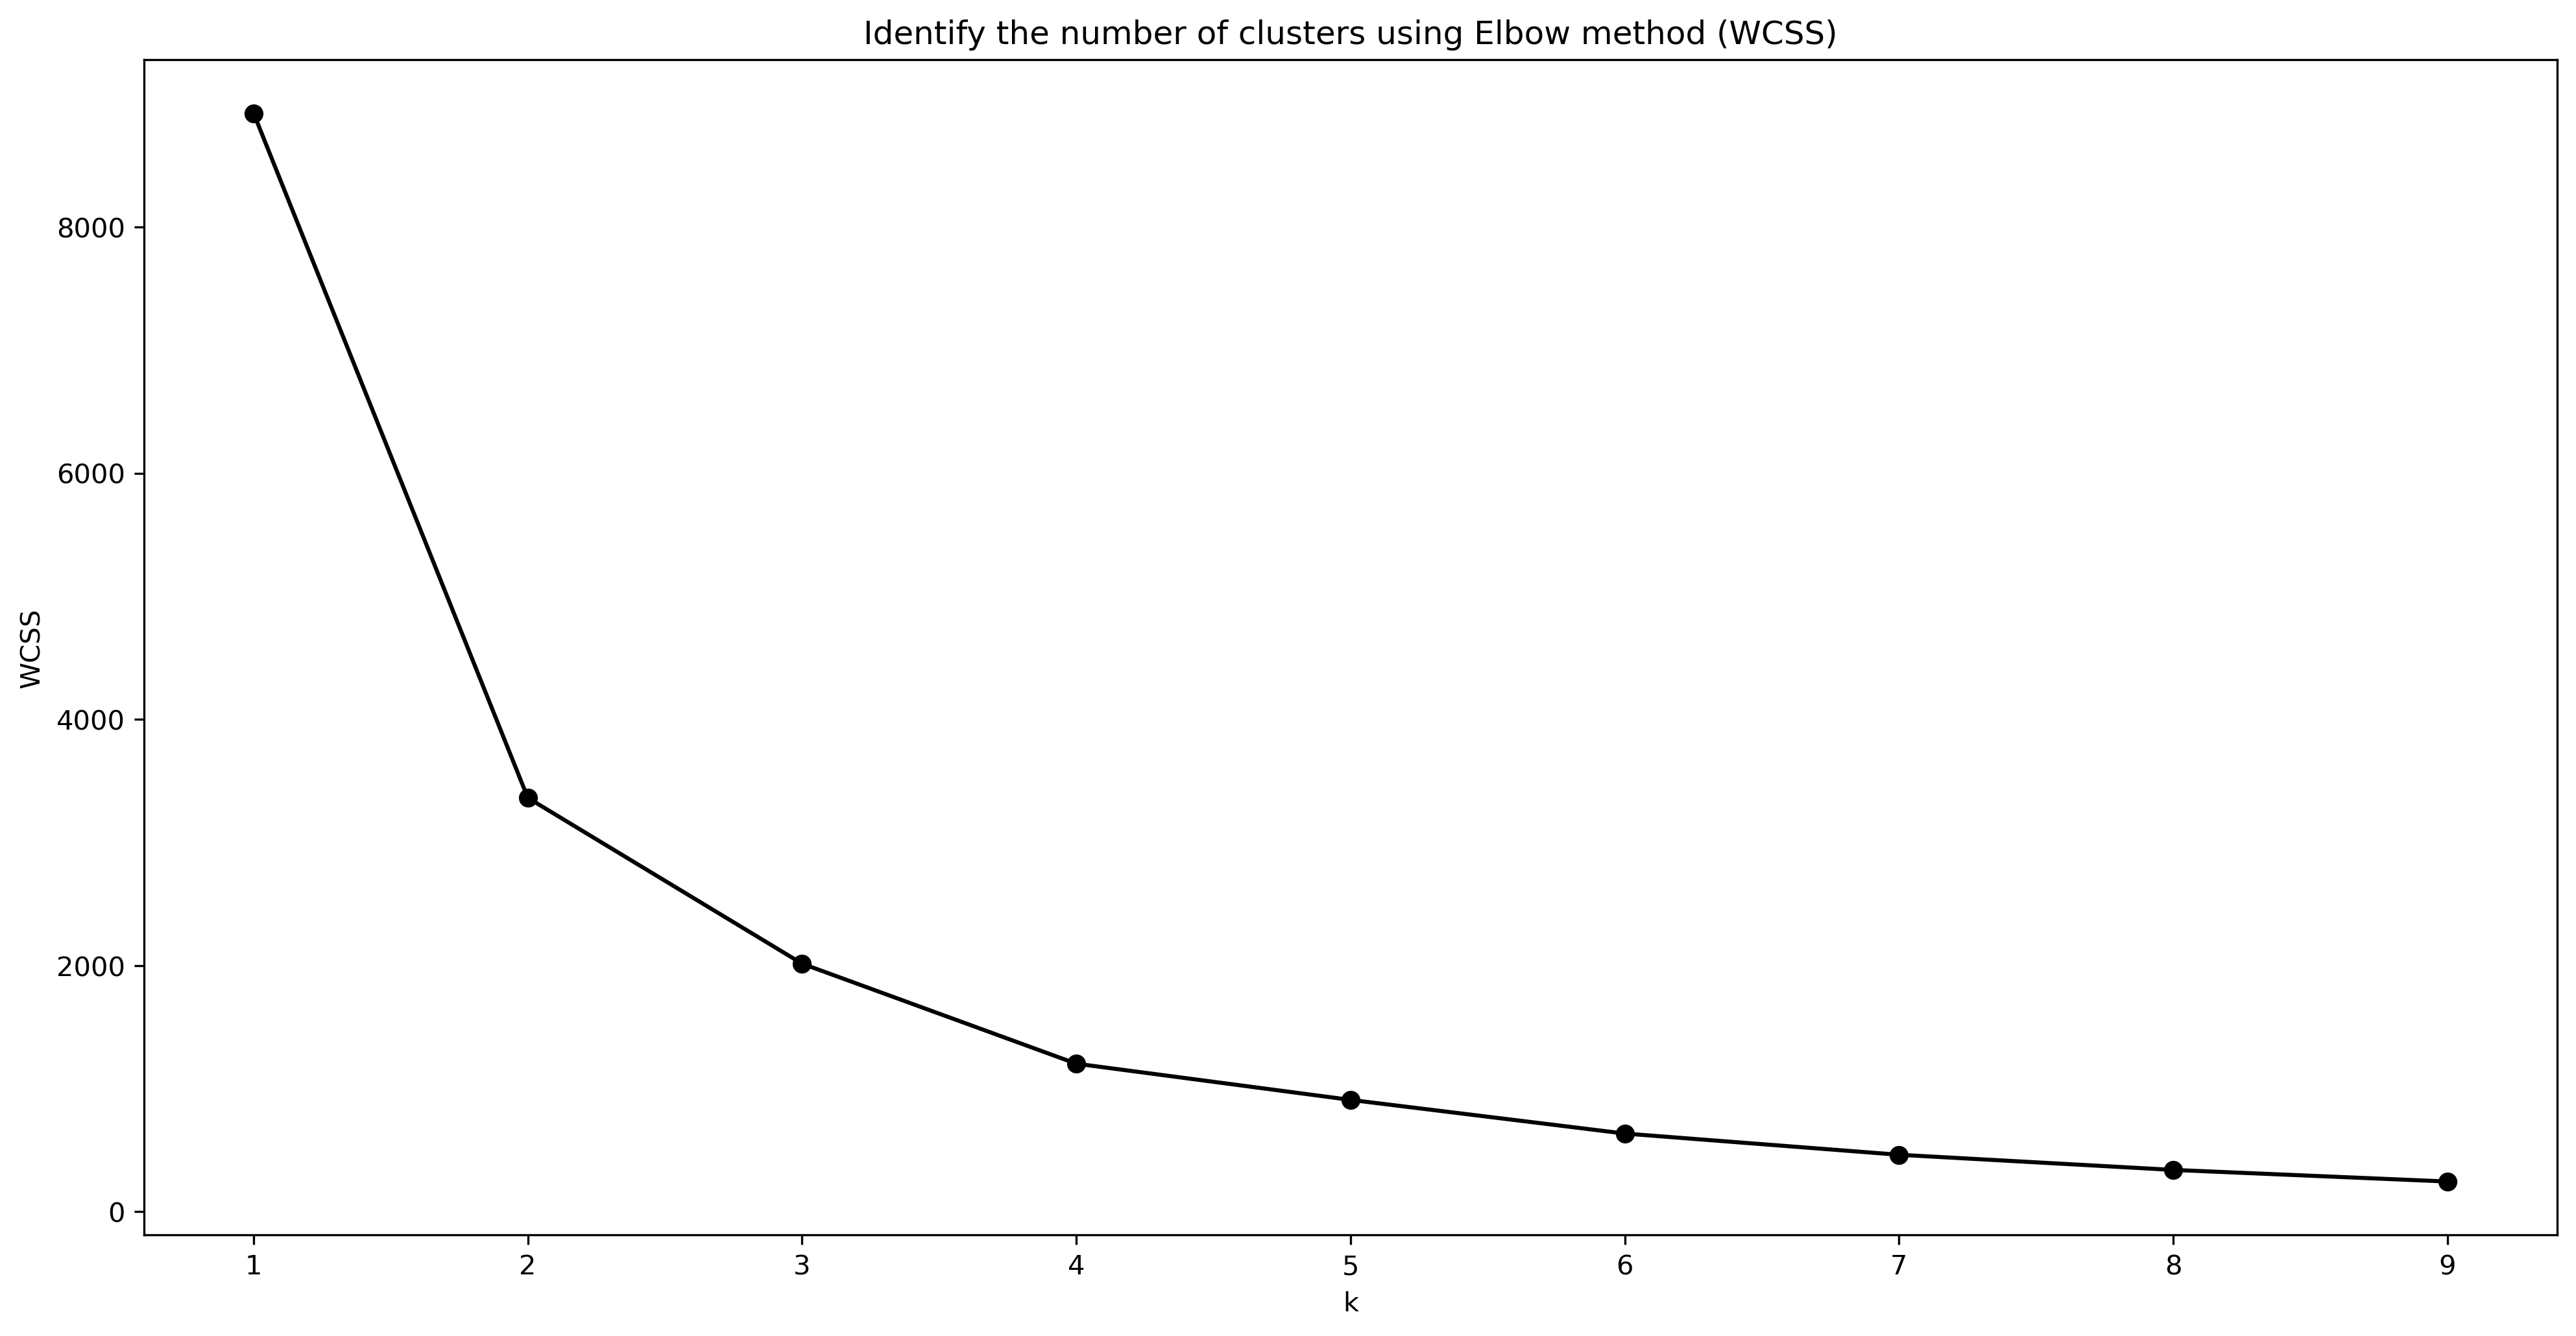

In [14]:
WCSS = []
K = range(1,10)
for k in K:
    kmod = KMeans(n_clusters=k)
    kmod.fit(df_loc[['Latitude', 'Longitude']])
    WCSS.append(kmod.inertia_)

plt.figure(figsize=(16,8), dpi=300)
plt.plot(K, WCSS, 'bo-', color='black')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.title('Identify the number of clusters using Elbow method (WCSS)')
plt.show()

In [15]:
X = df_loc[['Latitude', 'Longitude']]

model3 = KMeans(n_clusters=3,
                init='k-means++',
                n_init=10,
                max_iter=100)

model4 = KMeans(n_clusters=4,
                init='k-means++',
                n_init=10,
                max_iter=100)

clust3 = model3.fit(X)
clust4 = model4.fit(X)

print('*************** 3 Cluster Model ***************')
print('Cluster centers: ', clust3.cluster_centers_)
print('Inertia (WCSS): ', clust3.inertia_)
print('No. of iterations: ', clust3.n_iter_)
print()

print('*************** 4 Cluster Model ***************')
print('Cluster centers: ', clust4.cluster_centers_)
print('Inertia (WCSS): ', clust4.inertia_)
print('No. of iterations: ', clust4.n_iter_)

*************** 3 Cluster Model ***************
Cluster centers:  [[-34.83792384 147.37352644]
 [-33.22537333 117.02923765]
 [-18.69098432 136.76909848]]
Inertia (WCSS):  2015.7707892933856
No. of iterations:  2

*************** 4 Cluster Model ***************
Cluster centers:  [[-36.7397742  143.56127683]
 [-33.22537333 117.02923765]
 [-18.69098432 136.76909848]
 [-32.46061088 152.13883846]]
Inertia (WCSS):  1199.0081018798107
No. of iterations:  4


In [16]:
df_loc['Clust3']=clust3.labels_
df_loc['Clust4']=clust4.labels_
fig = go.Figure(data=go.Scattergeo(
        lat=df_loc['Latitude'],
        lon=df_loc['Longitude'],
        hovertext=df_loc[['Loc', 'Clust3']], 
        mode = 'markers',
        marker=dict(colorscale=['blue', 'red', '#34eb34']),
        marker_color = df_loc['Clust3'],
        ))

fig.add_trace(go.Scattergeo(lat=model3.cluster_centers_[:,0], lon=model3.cluster_centers_[:,1], 
                            mode='markers', marker_symbol='x', marker_size=12, 
                            marker_color=['red', 'blue', '#34eb34'],
                            marker_line_color='black',
                            marker_line_width=1
                           ))

fig.update_layout(
        title = 'Mapping Australian cities',
        title_font_color='black',
        showlegend=False,
        width=1000,
        height=600,
        margin={"r":10,"t":30,"l":0,"b":0},
        geo = dict(
            scope='world',
            projection_type='miller',
            landcolor = "rgb(250, 250, 250)",
            center=dict(lat=-23.69839, lon=133.8813),
            projection_scale=5 
        ),
    )

fig.show()